<a href="https://colab.research.google.com/github/Gasca78/Aprendiendo_Machine_Learning/blob/main/Python_Machine_Learning_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Clasificación: ¿Cómo funciona?

## 1.1 - Importando los datos

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('Customer.csv')

In [3]:
datos.shape

(7043, 18)

In [4]:
datos.head()

,Mayor60Años,Conyuge,Dependientes,MesesDeContrato,TelefonoFijo,VariasLineasTelefonicas,ServicioDeInternet,SeguridadOnline,BackupOnline,SeguroEnDispositivo,SoporteTecnico,TVCable,Streaming,TipoDeContrato,PagoOnline,FormaDePago,CuentaMensual,Churn
0,0,Si,No,1,No,SinServicioTelefonico,DSL,No,Si,No,No,No,No,Mensual,Si,ChequeDigital,29.85,No
1,0,No,No,34,Si,No,DSL,Si,No,Si,No,No,No,UnAño,No,ChequePapel,56.95,No
2,0,No,No,2,Si,No,DSL,Si,Si,No,No,No,No,Mensual,Si,ChequePapel,53.85,Si
3,0,No,No,45,No,SinServicioTelefonico,DSL,Si,No,Si,Si,No,No,UnAño,No,DebitoEnCuenta,42.30,No
4,0,No,No,2,Si,No,FibraOptica,No,No,No,No,No,No,Mensual,Si,ChequeDigital,70.70,Si


## 1.2 - Analizando las Variables

In [5]:
#Modificación (método) de forma manual
diccionario = {'Si': 1,
                'No': 0}

datosmodificados = datos[['Conyuge', 'Dependientes', 'TelefonoFijo', 'PagoOnline', 'Churn']].replace(diccionario) # Modificación de variables discretas, cambio de si y no a 1 y 0
datosmodificados.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [8]:
#Transformación con get_dummies
dummie_datos = pd.get_dummies(datos.drop(['Conyuge', 'Dependientes', 'TelefonoFijo', 'PagoOnline', 'Churn'],
                axis=1), dtype = int) # get_dummies, toma una variable y crea columnas diferentes según las variables que tenga un columna y cada una la cambiará con 1 y 0
                         # para no hacer segundas modificaciones, sacamos las columnas ya modificadas
#Unión de los datos transformados con los que ya teníamos
datos_final = pd.concat([datosmodificados, dummie_datos], axis=1) # axis = 1, maneja las columnas

In [11]:
datos_final.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn,Mayor60Años,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,...,Streaming_No,Streaming_Si,Streaming_SinServicioDeInternet,TipoDeContrato_DosAños,TipoDeContrato_Mensual,TipoDeContrato_UnAño,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoEnCuenta,FormaDePago_TarjetaDeCredito
0,1,0,0,1,0,0,1,29.85,0,0,...,1,0,0,0,1,0,1,0,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,1,0,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,45,42.30,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,1,0,0,0


In [10]:
datos_final.shape

(7043, 39)

## 1.3 - Definición Formal

Informaciones para la clasificación:

$X$ = inputs (datos de entrada)

$y$ = outputs (datos de salida)

In [12]:
#TIP
pd.set_option('display.max_columns', 39)

In [13]:
datos_final.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn,Mayor60Años,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,VariasLineasTelefonicas_SinServicioTelefonico,ServicioDeInternet_DSL,ServicioDeInternet_FibraOptica,ServicioDeInternet_No,SeguridadOnline_No,SeguridadOnline_Si,SeguridadOnline_SinServicioDeInternet,BackupOnline_No,BackupOnline_Si,BackupOnline_SinServicioDeInternet,SeguroEnDispositivo_No,SeguroEnDispositivo_Si,SeguroEnDispositivo_SinServicioDeInternet,SoporteTecnico_No,SoporteTecnico_Si,SoporteTecnico_SinServicioDeInternet,TVCable_No,TVCable_Si,TVCable_SinServicioDeInternet,Streaming_No,Streaming_Si,Streaming_SinServicioDeInternet,TipoDeContrato_DosAños,TipoDeContrato_Mensual,TipoDeContrato_UnAño,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoEnCuenta,FormaDePago_TarjetaDeCredito
0,1,0,0,1,0,0,1,29.85,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,45,42.30,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0



$y_i$ = $f(x_i)$

In [14]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [15]:
type(Xmaria)

list

In [ ]:
#ymaria = ?

Nuevo par de informaciones = ($Xmaria$, $ymaria$)

## 1.4 - Balanceamiento de los datos

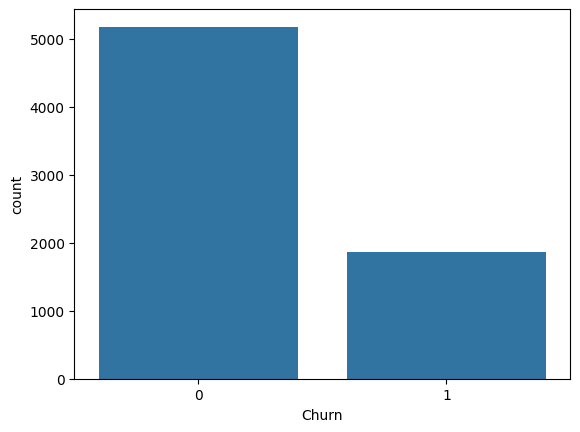

In [16]:
#variable target está desbalanceada
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data=datos_final)

In [17]:
datos_final.Churn.value_counts()

,count
Churn,
0,5174
1,1869


In [18]:
#biblioteca para balancear los datos utilizando over_sampling
from imblearn.over_sampling import SMOTE

In [19]:
#dividiendo los datos en características y target
X = datos_final.drop('Churn', axis = 1)
y = datos_final['Churn']

In [20]:
smt = SMOTE(random_state=123) #oversampling
X, y = smt.fit_resample(X, y) # Generación sintética de datos

In [21]:
#unión de los datos balanceados
datos_final = pd.concat([X, y], axis=1)

In [22]:
#verificación 1 - unión de los datos
datos_final.head(2)

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Mayor60Años,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,VariasLineasTelefonicas_SinServicioTelefonico,ServicioDeInternet_DSL,ServicioDeInternet_FibraOptica,ServicioDeInternet_No,SeguridadOnline_No,SeguridadOnline_Si,SeguridadOnline_SinServicioDeInternet,BackupOnline_No,BackupOnline_Si,BackupOnline_SinServicioDeInternet,SeguroEnDispositivo_No,SeguroEnDispositivo_Si,SeguroEnDispositivo_SinServicioDeInternet,SoporteTecnico_No,SoporteTecnico_Si,SoporteTecnico_SinServicioDeInternet,TVCable_No,TVCable_Si,TVCable_SinServicioDeInternet,Streaming_No,Streaming_Si,Streaming_SinServicioDeInternet,TipoDeContrato_DosAños,TipoDeContrato_Mensual,TipoDeContrato_UnAño,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoEnCuenta,FormaDePago_TarjetaDeCredito,Churn
0,1,0,0,1,0,1,29.85,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0


In [23]:
datos_final.shape

(10348, 39)

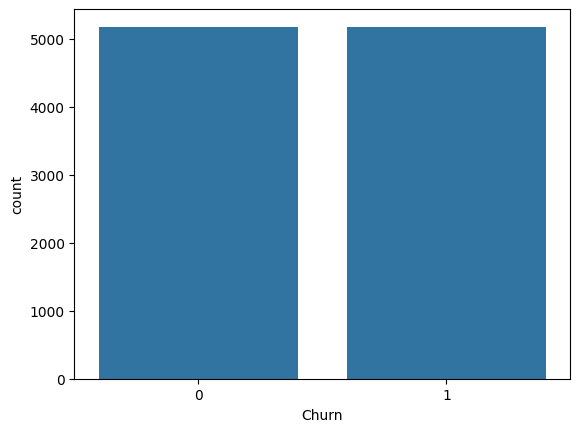

In [24]:
#verificación 2 - balanceamiento
ax = sns.countplot(x='Churn', data=datos_final)

In [25]:
datos_final.Churn.value_counts()

,count
Churn,
0,5174
1,5174


# Aula 2 - Método baseado en la proximidad

## 2.1 - Modelo K-nearest neighbors (KNN)

(PPT)

## 2.2 - KNN en la práctica

In [26]:
Xmaria

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [ ]:
#ymaria = ? # ¿se va o se queda?

In [27]:
#División en inputs y outputs
X = datos_final.drop('Churn', axis = 1)
y = datos_final['Churn']

In [28]:
#biblioteca para padronizar los datos
from sklearn.preprocessing import StandardScaler

In [29]:
norm = StandardScaler()
X_normalizado = norm.fit_transform(X) # Transformación (fit es para entrenar)
X_normalizado

array([[ 1.26568609, -0.52726104, -3.0591434 , ..., -0.47882211,
        -0.43570125, -0.42576817],
       [-0.79008532, -0.52726104,  0.32688889, ...,  2.08845829,
        -0.43570125, -0.42576817],
       [-0.79008532, -0.52726104,  0.32688889, ...,  2.08845829,
        -0.43570125, -0.42576817],
       ...,
       [-0.79008532, -0.52726104,  0.32688889, ..., -0.47882211,
        -0.43570125, -0.42576817],
       [-0.79008532, -0.52726104,  0.32688889, ..., -0.47882211,
        -0.43570125,  2.34869598],
       [-0.79008532, -0.52726104,  0.32688889, ..., -0.47882211,
        -0.43570125,  2.34869598]])

In [30]:
X_normalizado[0]

array([ 1.26568609, -0.52726104, -3.0591434 ,  0.81449258, -0.41318358,
       -1.10772865, -1.32175432, -0.88499468, -0.83366906,  3.18604176,
        1.51268338, -1.04386816, -0.44617598,  0.868102  , -0.5173695 ,
       -0.44617598, -0.95871762,  1.57352551, -0.44617598,  1.04326198,
       -0.64211419, -0.44617598,  0.87997069, -0.52441617, -0.44617598,
        1.18738125, -0.77707385, -0.44617598,  1.20287745, -0.78992399,
       -0.44617598, -0.44648735,  0.73788726, -0.41989297,  1.30265061,
       -0.47882211, -0.43570125, -0.42576817])

In [31]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns)) # Convertir lista Maria a un DataFrame, con la misma cantidad de columnas
Xmaria_normalizado

array([[-0.79008532, -0.52726104,  0.32688889,  0.81449258, -0.41318358,
        -1.14939314, -0.97235197,  1.1299503 , -0.83366906, -0.31386908,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.5173695 ,
        -0.44617598, -0.95871762, -0.63551559,  2.24126814,  1.04326198,
         1.5573554 , -0.44617598, -1.13640148,  1.90688246, -0.44617598,
         1.18738125, -0.77707385, -0.44617598, -0.83133988, -0.78992399,
         2.24126814, -0.44648735, -1.35522058,  2.38155929, -0.76766555,
        -0.47882211, -0.43570125,  2.34869598]])

Distancia Euclidiana:

$\sqrt{\sum_{i=1}^k(a_{i}-b_{i})^2}$


In [32]:
import numpy as np

In [33]:
a = Xmaria_normalizado

In [34]:
b = X_normalizado[0]

In [35]:
#1 - comenzamos restando
a - b

array([[-2.05577141,  0.        ,  3.3860323 ,  0.        ,  0.        ,
        -0.04166449,  0.34940235,  2.01494498,  0.        , -3.49991084,
        -2.17376025,  2.00184354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -2.2090411 ,  2.68744412,  0.        ,
         2.19946959,  0.        , -2.01637218,  2.43129863,  0.        ,
         0.        ,  0.        ,  0.        , -2.03421733,  0.        ,
         2.68744412,  0.        , -2.09310784,  2.80145225, -2.07031616,
         0.        ,  0.        ,  2.77446415]])

In [36]:
#2 - después realizamos la exponenciación
np.square(a-b)

array([[4.22619609e+00, 0.00000000e+00, 1.14652147e+01, 0.00000000e+00,
        0.00000000e+00, 1.73592970e-03, 1.22082005e-01, 4.06000326e+00,
        0.00000000e+00, 1.22493759e+01, 4.72523363e+00, 4.00737757e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.87986260e+00, 7.22235589e+00, 0.00000000e+00,
        4.83766647e+00, 0.00000000e+00, 4.06575675e+00, 5.91121304e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13804017e+00, 0.00000000e+00, 7.22235589e+00, 0.00000000e+00,
        4.38110042e+00, 7.84813473e+00, 4.28620902e+00, 0.00000000e+00,
        0.00000000e+00, 7.69765133e+00]])

In [37]:
#3 - realizamos la suma
np.sum(np.square(a-b))

103.34756537070768

In [38]:
#4 - finalmente obtenemos la raiz cuadrada y tenemos nuestra distancia
np.sqrt(103.36325779671671)

10.166772240820423

## 2.3 - Implementando el modelo

In [39]:
#biblioteca para división de los datos
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

### Entrenamiento y prueba

In [41]:
#biblioteca para crear el modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [42]:
#iniciar el modelo (creamos el modelo) - por default son 5 vecinos
knn = KNeighborsClassifier(metric='euclidean') # Se puede configurar la cantidad de vecinos con n_neighbors

In [43]:
#entrenando el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [44]:
#probando el modelo con los datos de prueba
prediccion_knn = knn.predict(X_test)

In [45]:
prediccion_knn

array([1, 0, 0, ..., 0, 1, 1])

# Aula 3 - Método probabilístico

## 3.1 - Teorema de Naive Bayes

(PPT)

## 3.2 - Modelo Bernoulli Naive Bayes

(PPT)

## 3.3 - Entrenamiento y prueba

In [46]:
#biblioteca para crear el modelo de machine learning
from sklearn.naive_bayes import BernoulliNB

In [47]:
X_train # No están binarizados

array([[-0.79008532, -0.52726104, -3.0591434 , ...,  2.08845829,
        -0.43570125, -0.42576817],
       [ 1.26568609,  1.89659378,  0.32688889, ...,  2.08845829,
        -0.43570125, -0.42576817],
       [-0.79008532, -0.52726104,  0.32688889, ..., -0.47882211,
        -0.43570125, -0.42576817],
       ...,
       [ 1.26568609,  1.89659378,  0.32688889, ...,  2.08845829,
        -0.43570125, -0.42576817],
       [ 1.26568609,  1.89659378,  0.32688889, ..., -0.47882211,
        -0.43570125, -0.42576817],
       [-0.79008532, -0.52726104,  0.32688889, ..., -0.47882211,
        -0.43570125, -0.42576817]])

In [48]:
#escojo utilizar mediana, porque es el valor central de nuestros datos ordenados
mediana = np.median(X_train)
mediana

-0.4461759755508453

In [49]:
#Binarizando los recursos usando la mediana
X_train_binarizado = np.where(X_train > mediana, 1, 0)

In [50]:
X_train_binarizado # Valores binarizados

array([[0, 0, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 1, 1]])

In [51]:
y_train

,Churn
4831,0
5077,0
9023,1
4424,1
5236,0
...,...
9785,1
7763,1
5218,0
1346,1


In [52]:
#creamos el modelo
bnb = BernoulliNB()

In [53]:
#entrenando el modelo
bnb.fit(X_train_binarizado, y_train)

BernoulliNB()

In [54]:
#Binarizando la base de prueba
X_test_binarizado = np.where(X_test > np.median(X_test), 1, 0)

In [55]:
#probando el modelo
prediccion_BNb = bnb.predict(X_test_binarizado)

In [56]:
prediccion_BNb

array([1, 0, 0, ..., 1, 1, 1])

# Aula 4 - Método Simbólico

## 4.1 - ¿Qué es un árbol de decisión?

(PPT)

## 4.2 - ¿Cómo funciona un árbol de decisión?

(PPT)

## 4.3 - Implementando el modelo

In [57]:
#biblioteca para crear el modelo de machine learning
from sklearn.tree import DecisionTreeClassifier

In [59]:
#iniciando el modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42) # Se podría adicionar la cantidad máxima de ramas min_samples_split, min_samples_leaf, etc...

In [60]:
#entrenando el modelo
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [61]:
#verificando la importancia de cada atributo
dtc.feature_importances_

array([0.02059463, 0.01292607, 0.00588815, 0.01765534, 0.01651137,
       0.1706773 , 0.21872806, 0.01108524, 0.0086157 , 0.00442302,
       0.00200899, 0.03128648, 0.        , 0.00983723, 0.01612587,
       0.        , 0.00523367, 0.0106161 , 0.00027769, 0.01133316,
       0.00716808, 0.        , 0.01219934, 0.02122625, 0.        ,
       0.00389948, 0.00371121, 0.00433452, 0.00842561, 0.01108416,
       0.        , 0.03622159, 0.16358635, 0.07445054, 0.02244536,
       0.02208178, 0.01831968, 0.01702198])

In [62]:
prediccion_ArbolDecision = dtc.predict(X_test)

In [63]:
prediccion_ArbolDecision

array([0, 0, 0, ..., 1, 1, 1])

# Aula 5 - Validación de los modelos

## 5.1 - Matriz de confusión



In [64]:
y_test # Datos reales

,Churn
5603,1
1112,0
6175,0
7905,1
6461,0
...,...
4099,0
8389,1
5131,1
3725,1


![image.png](https://raw.githubusercontent.com/ElProfeAlejo/machine_learning_clasificacion/main/imagen_5_1.png)

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
print(confusion_matrix(y_test, prediccion_knn))

[[1241  328]
 [ 247 1289]]


In [67]:
print(confusion_matrix(y_test, prediccion_BNb))

[[1048  521]
 [ 241 1295]]


In [68]:
print(confusion_matrix(y_test, prediccion_ArbolDecision))

[[1243  326]
 [ 279 1257]]


## 5.2 - Accuracy
A partir del cálculo de la matriz de confusión, podemos inferir otras métricas, como el accuracy.




$ACC$ = ${TP + TN \over TP + FP + TN + FN}$

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
#modelo KNN
print(accuracy_score(y_test, prediccion_knn))

0.8148148148148148


In [71]:
#modelo Bernoulli de Naive Bayes
print(accuracy_score(y_test, prediccion_BNb))

0.7545893719806763


In [72]:
#modelo Arbol de Decisión
print(accuracy_score(y_test, prediccion_ArbolDecision))

0.8051529790660226


## 5.3 - Precisión

Otra métrica importante es la precisión, que calcula cuántos se clasificaron correctamente como positivos ($TP$).

$PS$ = ${TP \over TP + FP}$

In [73]:
from sklearn.metrics import precision_score

In [74]:
#modelo KNN
print(precision_score(y_test, prediccion_knn))

0.7971552257266543


In [75]:
#modelo Bernoulli de Naive Bayes
print(precision_score(y_test, prediccion_BNb))

0.7131057268722467


In [76]:
#modelo Arbol de Decisión
print(precision_score(y_test, prediccion_ArbolDecision))

0.7940619077700568


## 5.4 - Recall

Otra métrica es el Recall o sensibilidad, calcula qué tan bueno es el modelo para clasificar correctamente un resultado positivo ($TP$).

$RC$ = ${TP \over TP + FN}$

In [77]:
from sklearn.metrics import recall_score

In [78]:
#modelo KNN
print(recall_score(y_test, prediccion_knn))

0.8391927083333334


In [79]:
#modelo Bernoulli de Naive Bayes
print(recall_score(y_test, prediccion_BNb))

0.8430989583333334


In [80]:
#modelo Arbol de Decisión
print(recall_score(y_test, prediccion_ArbolDecision))

0.818359375


## 5.5 - Escogiendo el mejor modelo


In [81]:
#Ejemplo - análisis de las precisiones previamente calculadas
print('Modelo KNN: ', precision_score(y_test, prediccion_knn))
print('Modelo Bernoulli de Naive Bayes: ', precision_score(y_test, prediccion_BNb))
print('Modelo Arbol de Decisión: ', precision_score(y_test, prediccion_ArbolDecision))

Modelo KNN:  0.7971552257266543
Modelo Bernoulli de Naive Bayes:  0.7131057268722467
Modelo Arbol de Decisión:  0.7940619077700568


In [82]:
#Probando el mejor modelo para Maria
prediccion_maria = knn.predict(Xmaria_normalizado)
diccionario = {'Si': 1, 'No': 0}

clave_encontrada = next((clave for clave, valor in diccionario.items() if valor == prediccion_maria[0]), None)
print(f"La probabilidad de que Maria se convierta en Churn es: {clave_encontrada}")

La probabilidad de que Maria se convierta en Churn es: No
